In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from collections import defaultdict
from bs4 import BeautifulSoup
import nltk
from datetime import datetime
import requests

In [32]:
base_url = lambda x: f'http://quotes.toscrape.com/page/{x}/'

# I. Thu thập dữ liệu

## 1.1 Cào dữ liệu
Chúng em cào các url của từng author, kết hợp thêm số thứ tự của author trong từng trang và thứ tự của trang

In [79]:
all_author_url = []
for page in range(1, 11):
    soup = BeautifulSoup(requests.get(base_url(page)).text, 'html.parser')
    author_url = [('http://quotes.toscrape.com' + i['href'], page, idx) for idx, i in enumerate(soup.select('span > a')[:10])]
    all_author_url += author_url
all_author_url

[('http://quotes.toscrape.com/author/Albert-Einstein', 1, 0),
 ('http://quotes.toscrape.com/author/J-K-Rowling', 1, 1),
 ('http://quotes.toscrape.com/author/Albert-Einstein', 1, 2),
 ('http://quotes.toscrape.com/author/Jane-Austen', 1, 3),
 ('http://quotes.toscrape.com/author/Marilyn-Monroe', 1, 4),
 ('http://quotes.toscrape.com/author/Albert-Einstein', 1, 5),
 ('http://quotes.toscrape.com/author/Andre-Gide', 1, 6),
 ('http://quotes.toscrape.com/author/Thomas-A-Edison', 1, 7),
 ('http://quotes.toscrape.com/author/Eleanor-Roosevelt', 1, 8),
 ('http://quotes.toscrape.com/author/Steve-Martin', 1, 9),
 ('http://quotes.toscrape.com/author/Marilyn-Monroe', 2, 0),
 ('http://quotes.toscrape.com/author/J-K-Rowling', 2, 1),
 ('http://quotes.toscrape.com/author/Albert-Einstein', 2, 2),
 ('http://quotes.toscrape.com/author/Bob-Marley', 2, 3),
 ('http://quotes.toscrape.com/author/Dr-Seuss', 2, 4),
 ('http://quotes.toscrape.com/author/Douglas-Adams', 2, 5),
 ('http://quotes.toscrape.com/author/Elie-

In [130]:
with open('kq.txt', 'w') as f:
    for i in all_author_url:
        f.writelines(f'{i[0]}, {i[1]}, {i[2]}')

## 1.2 a) đọc thẻ và lưu trong biến result

In [120]:
result = []
for author in all_author_url:
    soup = BeautifulSoup(requests.get(base_url(author[1])).text, 'html.parser')
    result += soup.select('div.quote')
print(result)

[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>, <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop="author">J.K.

## 1.2 b) hãy tìm biến result vừa rồi....

In [129]:
ans = []
for res in result:
    ans += res.select('small.author')
print(ans)

[<small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">J.K. Rowling</small>, <small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">Jane Austen</small>, <small class="author" itemprop="author">Marilyn Monroe</small>, <small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">André Gide</small>, <small class="author" itemprop="author">Thomas A. Edison</small>, <small class="author" itemprop="author">Eleanor Roosevelt</small>, <small class="author" itemprop="author">Steve Martin</small>, <small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">J.K. Rowling</small>, <small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">Jane Austen</small>, <small class="author" itemprop="author">Marilyn Monroe</small>, <small class="author" itemprop="author">Alber

## 1.2 c) viết hàm tacgiaLink()

In [98]:
def tacgiaLink(author):
    author_url, page_idx, author_idx = author
    soup = BeautifulSoup(requests.get(base_url(page_idx)).text, 'html.parser')
    author_name = soup.select('small.author')[author_idx].text
    author_quote = re.sub('[”“]', '', soup.select('span.text')[author_idx].text)
    soup2 = BeautifulSoup(requests.get(author_url).text, 'html.parser')
    born = soup2.select_one('span.author-born-date').text
    author_born = pd.to_datetime(born)
    return {
        'Tacgia': [author_name],
        'Link': [author_url],
        'Namsinh': [author_born],
        'Quote': [author_quote]
    }

## 1.2 d) Lưu kết quả ở câu C vào file Quote.csv

In [410]:
df = pd.DataFrame(columns=['Tacgia', 'Link', 'Namsinh', 'Quote'])
df

,Tacgia,Link,Namsinh,Quote


In [105]:
for author in all_author_url:
    tac_gia_content = tacgiaLink(author)
    print(tac_gia_content)
    print('-'*100)
    df = pd.concat([df, pd.DataFrame(tac_gia_content)])

{'Tacgia': ['Albert Einstein'], 'Link': ['http://quotes.toscrape.com/author/Albert-Einstein'], 'Namsinh': [Timestamp('1879-03-14 00:00:00')], 'Quote': ['The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.']}
----------------------------------------------------------------------------------------------------
{'Tacgia': ['J.K. Rowling'], 'Link': ['http://quotes.toscrape.com/author/J-K-Rowling'], 'Namsinh': [Timestamp('1965-07-31 00:00:00')], 'Quote': ['It is our choices, Harry, that show what we truly are, far more than our abilities.']}
----------------------------------------------------------------------------------------------------
{'Tacgia': ['Albert Einstein'], 'Link': ['http://quotes.toscrape.com/author/Albert-Einstein'], 'Namsinh': [Timestamp('1879-03-14 00:00:00')], 'Quote': ['There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.']}
---------

In [109]:
df = df.reset_index(drop=True)

In [110]:
df.to_csv('Quote.csv')

# II. Khai phá dữ liệu

In [411]:
df = pd.read_csv('Quote.csv', index_col=0, parse_dates=['Namsinh'])
df.head()

,Tacgia,Link,Namsinh,Quote
0,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,The world as we have created it is a process o...
1,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,"It is our choices, Harry, that show what we tr..."
2,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,There are only two ways to live your life. One...
3,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,1775-12-16,"The person, be it gentleman or lady, who has n..."
4,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,1926-06-01,"Imperfection is beauty, madness is genius and ..."


## 2.1 Xử lý dữ liệu

In [412]:
df['STT'] = np.arange(1, df.shape[0]+1)

### Thêm trường STT vào dữ liệu

### Xử lý dữ liệu trường ngày sinh :
    Do dữ liệu chúng em cào về nên Trường ngày sinh không bị thiếu. Nhưng nếu đề xuất cách điền chúng em sẽ tìm trên mạng thông tin ngày sinh của người đó và điền vào dữ liệu bị thiếu.

### Thêm Trường tuổi và để xuất cách điền tuổi của tác giả
Trang web dùng để cào không có thông tin về ngày mất của tác giả nên chúng ta không thể lấy dữ liệu từ đó để tính tuổi. Số lượng dữ liệu có hạn nên em sẽ đề xuất cách điền tuổi bằng tay. Tuổi của tác giả được tính bằng cách lấy năm mất trừ đi năm sinh, trường hợp còn lại ta sẽ lấy năm hiện tại trừ đi năm sinh.

In [413]:
Tuoilist = [76, 55, 41, 36, 81, 84, 78, 75, 36, 87, 49,
            87, 56, 74, 86, 69, 78, 87, 78, 53, 78, 85,
            87, 61, 72, 64, 39, 63, 72, 71, 47, 61, 87, 
            94, 73, 58, 81, 83, 66, 91, 71, 40, 66, 77, 
            27, 77, 68, 56, 89, 88]

In [414]:
df.Tacgia.unique().tolist()

['Albert Einstein',
 'J.K. Rowling',
 'Jane Austen',
 'Marilyn Monroe',
 'André Gide',
 'Thomas A. Edison',
 'Eleanor Roosevelt',
 'Steve Martin',
 'Bob Marley',
 'Dr. Seuss',
 'Douglas Adams',
 'Elie Wiesel',
 'Friedrich Nietzsche',
 'Mark Twain',
 'Allen Saunders',
 'Pablo Neruda',
 'Ralph Waldo Emerson',
 'Mother Teresa',
 'Garrison Keillor',
 'Jim Henson',
 'Charles M. Schulz',
 'William Nicholson',
 'Jorge Luis Borges',
 'George Eliot',
 'George R.R. Martin',
 'C.S. Lewis',
 'Martin Luther King Jr.',
 'James Baldwin',
 'Haruki Murakami',
 'Alexandre Dumas fils',
 'Stephenie Meyer',
 'Ernest Hemingway',
 'Helen Keller',
 'George Bernard Shaw',
 'Charles Bukowski',
 'Suzanne Collins',
 'J.R.R. Tolkien',
 'Alfred Tennyson',
 'Terry Pratchett',
 'J.D. Salinger',
 'George Carlin',
 'John Lennon',
 'W.C. Fields',
 'Ayn Rand',
 'Jimi Hendrix',
 'J.M. Barrie',
 'E.E. Cummings',
 'Khaled Hosseini',
 'Harper Lee',
 "Madeleine L'Engle"]

In [415]:
Tuoidict = {}
for i, j in zip(df.Tacgia.unique().tolist(), Tuoilist):
        Tuoidict[i] = j

In [416]:
Tuoidict

{'Albert Einstein': 76,
 'J.K. Rowling': 55,
 'Jane Austen': 41,
 'Marilyn Monroe': 36,
 'André Gide': 81,
 'Thomas A. Edison': 84,
 'Eleanor Roosevelt': 78,
 'Steve Martin': 75,
 'Bob Marley': 36,
 'Dr. Seuss': 87,
 'Douglas Adams': 49,
 'Elie Wiesel': 87,
 'Friedrich Nietzsche': 56,
 'Mark Twain': 74,
 'Allen Saunders': 86,
 'Pablo Neruda': 69,
 'Ralph Waldo Emerson': 78,
 'Mother Teresa': 87,
 'Garrison Keillor': 78,
 'Jim Henson': 53,
 'Charles M. Schulz': 78,
 'William Nicholson': 85,
 'Jorge Luis Borges': 87,
 'George Eliot': 61,
 'George R.R. Martin': 72,
 'C.S. Lewis': 64,
 'Martin Luther King Jr.': 39,
 'James Baldwin': 63,
 'Haruki Murakami': 72,
 'Alexandre Dumas fils': 71,
 'Stephenie Meyer': 47,
 'Ernest Hemingway': 61,
 'Helen Keller': 87,
 'George Bernard Shaw': 94,
 'Charles Bukowski': 73,
 'Suzanne Collins': 58,
 'J.R.R. Tolkien': 81,
 'Alfred Tennyson': 83,
 'Terry Pratchett': 66,
 'J.D. Salinger': 91,
 'George Carlin': 71,
 'John Lennon': 40,
 'W.C. Fields': 66,
 'Ay

In [417]:
df['Tuoi'] = df['Tacgia'].map(Tuoidict)

## 2.2 Khám phá dữ liệu

In [418]:
print(f'Kích cỡ của dữ liệu: {df.shape}')

Kích cỡ của dữ liệu: (100, 6)


In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tacgia   100 non-null    object        
 1   Link     100 non-null    object        
 2   Namsinh  100 non-null    datetime64[ns]
 3   Quote    100 non-null    object        
 4   STT      100 non-null    int32         
 5   Tuoi     100 non-null    int64         
dtypes: datetime64[ns](1), int32(1), int64(1), object(3)
memory usage: 5.1+ KB


In [420]:
df.describe()

,STT,Tuoi
count,100.000000,100.000000
mean,50.500000,66.020000
std,29.011492,17.211683
min,1.000000,27.000000
25%,25.750000,55.000000
50%,50.500000,72.000000
75%,75.250000,78.000000
max,100.000000,94.000000


In [421]:
df.isna().sum()

Tacgia     0
Link       0
Namsinh    0
Quote      0
STT        0
Tuoi       0
dtype: int64

## 10 người nổi tiếng có số lượng quote trong bộ dữ liệu là nhiều nhất

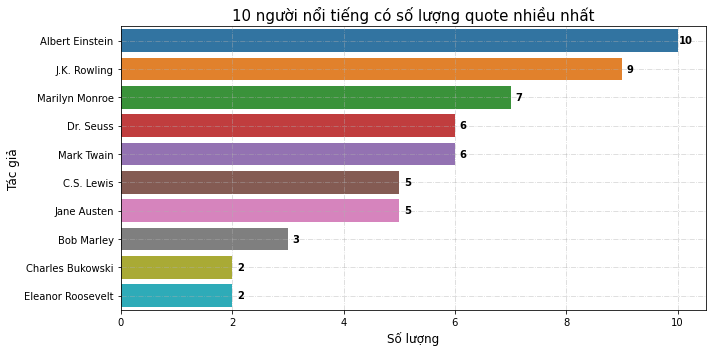

In [422]:
f, ax = plt.subplots(figsize=(10, 5))
g = sns.barplot(data=pd.DataFrame(df.groupby('Tacgia').count()['Quote'].nlargest(10)).reset_index(), y='Tacgia', x='Quote')
for p in g.patches:
    ax.annotate(
        format(p.get_width(), '.0f'),
        (p.get_width() + 0.15, p.get_y() + 0.5 * p.get_height()),
        ha='center', va='center', weight='bold'
    )
ax.grid(True, alpha=0.5, ls='-.')
ax.set_title('10 người nổi tiếng có số lượng quote nhiều nhất', fontsize=15)
ax.set_xlabel('Số lượng', fontsize=12)
ax.set_ylabel('Tác giả', fontsize=12)
f.tight_layout()
plt.show()

In [423]:
df['QuoteLen'] = df['Quote'].apply(lambda x: len(x))

## Top 10 người nổi tiếng có độ dài câu quote dài nhất

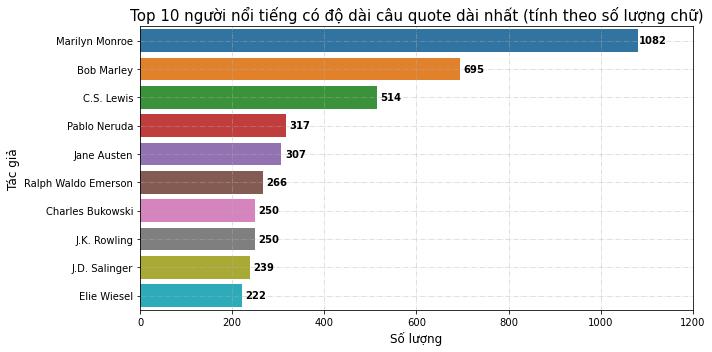

In [424]:
f, ax = plt.subplots(figsize=(10, 5))
g = sns.barplot(data=df.sort_values(by=['QuoteLen'], ascending=False).reset_index().loc[:9], x='QuoteLen', y='Tacgia')
for p in g.patches:
    ax.annotate(
        format(p.get_width(), '.0f'),
        (p.get_width() + 30, p.get_y() + 0.5 * p.get_height()),
        ha='center', va='center', weight='bold'
    )
ax.grid(True, alpha=0.5, ls='-.')
ax.set_title('Top 10 người nổi tiếng có độ dài câu quote dài nhất (tính theo số lượng chữ)', fontsize=15)
ax.set_xlabel('Số lượng', fontsize=12)
ax.set_ylabel('Tác giả', fontsize=12)
ax.set_xlim(0, 1200)
f.tight_layout()
plt.show()

## 10 người nổi tiếng có độ dài câu quote ngắn nhất

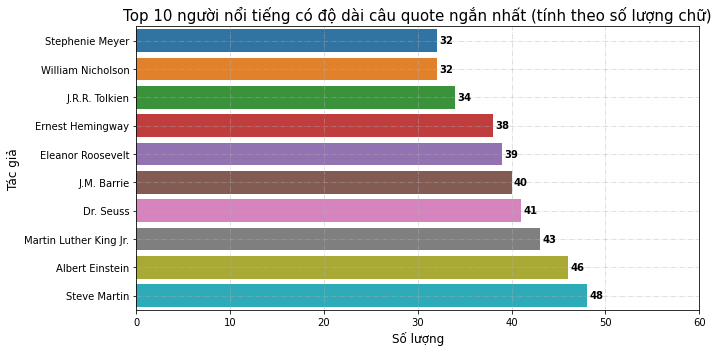

In [425]:
f, ax = plt.subplots(figsize=(10, 5))
g = sns.barplot(data=df.sort_values(by=['QuoteLen']).reset_index().loc[:9], x='QuoteLen', y='Tacgia')
for p in g.patches:
    ax.annotate(
        format(p.get_width(), '.0f'),
        (p.get_width() + 1, p.get_y() + 0.5 * p.get_height()),
        ha='center', va='center', weight='bold'
    )
ax.grid(True, alpha=0.5, ls='-.')
ax.set_title('Top 10 người nổi tiếng có độ dài câu quote ngắn nhất (tính theo số lượng chữ)', fontsize=15)
ax.set_xlabel('Số lượng', fontsize=12)
ax.set_ylabel('Tác giả', fontsize=12)
ax.set_xlim(0, 60)
f.tight_layout()
plt.show()

## 10 tác giả có số lượng từ trong quote nhiều nhất

In [426]:
df['QuoteNumWord'] = df.Quote.apply(lambda x: len(x.split()))

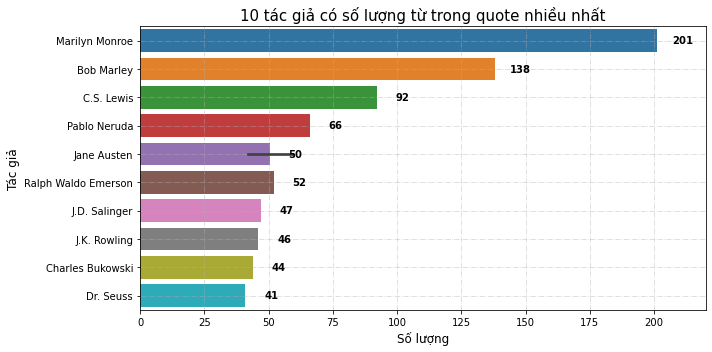

In [427]:
f, ax = plt.subplots(figsize=(10, 5))
g = sns.barplot(data=df.sort_values(by=['QuoteNumWord'], ascending=False).reset_index()[:11], x='QuoteNumWord', y='Tacgia')
for p in g.patches:
    ax.annotate(
        format(p.get_width(), '.0f'),
        (p.get_width() + 10, p.get_y() + 0.5 * p.get_height()),
        ha='center', va='center', weight='bold'
    )
ax.grid(True, alpha=0.5, ls='-.')
ax.set_title('10 tác giả có số lượng từ trong quote nhiều nhất', fontsize=15)
ax.set_xlabel('Số lượng', fontsize=12)
ax.set_ylabel('Tác giả', fontsize=12)
ax.set_xlim(0, 220)
f.tight_layout()
plt.show()

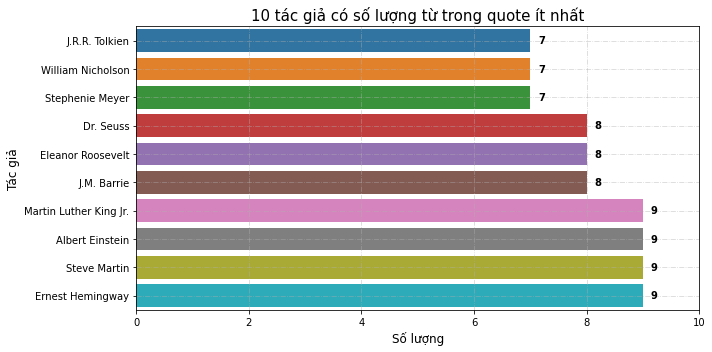

In [428]:
f, ax = plt.subplots(figsize=(10, 5))
g = sns.barplot(data=df.sort_values(by=['QuoteNumWord']).reset_index()[:10], x='QuoteNumWord', y='Tacgia')
for p in g.patches:
    ax.annotate(
        format(p.get_width(), '.0f'),
        (p.get_width() + 0.2, p.get_y() + 0.5 * p.get_height()),
        ha='center', va='center', weight='bold'
    )
ax.grid(True, alpha=0.5, ls='-.')
ax.set_title('10 tác giả có số lượng từ trong quote ít nhất', fontsize=15)
ax.set_xlabel('Số lượng', fontsize=12)
ax.set_ylabel('Tác giả', fontsize=12)
ax.set_xlim(0, 10)
f.tight_layout()
plt.show()

In [429]:
df

,Tacgia,Link,Namsinh,Quote,STT,Tuoi,QuoteLen,QuoteNumWord
0,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,The world as we have created it is a process o...,1,76,113,21
1,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,"It is our choices, Harry, that show what we tr...",2,55,83,16
2,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,There are only two ways to live your life. One...,3,76,129,26
3,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,1775-12-16,"The person, be it gentleman or lady, who has n...",4,41,102,19
4,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,1926-06-01,"Imperfection is beauty, madness is genius and ...",5,36,109,16
...,...,...,...,...,...,...,...,...
95,Harper Lee,http://quotes.toscrape.com/author/Harper-Lee,1926-04-28,You never really understand a person until you...,96,89,146,27
96,Madeleine L'Engle,http://quotes.toscrape.com/author/Madeleine-LE...,1918-11-29,You have to write the book that wants to be wr...,97,88,137,27
97,Mark Twain,http://quotes.toscrape.com/author/Mark-Twain,1835-11-30,Never tell the truth to people who are not wor...,98,74,56,12
98,Dr. Seuss,http://quotes.toscrape.com/author/Dr-Seuss,1904-03-02,"A person's a person, no matter how small.",99,87,41,8


## 2.3 Trích xuất đặc trưng - Feature Extraction

Có thể tách năm sinh của từng tác giả ra để tạo một feature mới

In [432]:
df['Year'] = df['Namsinh'].apply(lambda x: x.year)
df['Day'] = df['Namsinh'].apply(lambda x: x.day)
df['Month'] = df['Namsinh'].apply(lambda x: x.month)

In [433]:
from sklearn.preprocessing import LabelEncoder

Mã hóa tên cho các tác giả

In [434]:
encoder = LabelEncoder()
df['Tacgia'] = encoder.fit_transform(df.Tacgia)

In [437]:
df['Tacgia'].values

array([ 0, 26,  0, 30, 37,  0,  4, 47, 13, 44, 37, 26,  0,  6, 11, 10, 14,
       16, 38,  3, 41, 42, 40, 17, 31, 11,  0, 26,  0,  6, 11, 26,  6, 40,
       26,  9, 49,  0, 34, 20, 21,  7, 37, 37,  0, 37, 37, 39, 26, 29, 30,
       13, 37,  0, 23,  1, 43, 15, 24, 18,  8, 45, 45,  7, 28, 26, 15, 42,
       38, 11,  2,  8, 46, 11, 25, 19, 33, 48,  5, 38,  0, 30, 26, 30, 30,
        7,  7, 38, 38,  7, 26, 32, 27, 12, 35, 22, 36, 38, 11, 21])

In [435]:
encoder.classes_

array(['Albert Einstein', 'Alexandre Dumas fils', 'Alfred Tennyson',
       'Allen Saunders', 'André Gide', 'Ayn Rand', 'Bob Marley',
       'C.S. Lewis', 'Charles Bukowski', 'Charles M. Schulz',
       'Douglas Adams', 'Dr. Seuss', 'E.E. Cummings', 'Eleanor Roosevelt',
       'Elie Wiesel', 'Ernest Hemingway', 'Friedrich Nietzsche',
       'Garrison Keillor', 'George Bernard Shaw', 'George Carlin',
       'George Eliot', 'George R.R. Martin', 'Harper Lee',
       'Haruki Murakami', 'Helen Keller', 'J.D. Salinger', 'J.K. Rowling',
       'J.M. Barrie', 'J.R.R. Tolkien', 'James Baldwin', 'Jane Austen',
       'Jim Henson', 'Jimi Hendrix', 'John Lennon', 'Jorge Luis Borges',
       'Khaled Hosseini', "Madeleine L'Engle", 'Marilyn Monroe',
       'Mark Twain', 'Martin Luther King Jr.', 'Mother Teresa',
       'Pablo Neruda', 'Ralph Waldo Emerson', 'Stephenie Meyer',
       'Steve Martin', 'Suzanne Collins', 'Terry Pratchett',
       'Thomas A. Edison', 'W.C. Fields', 'William Nicholson'],

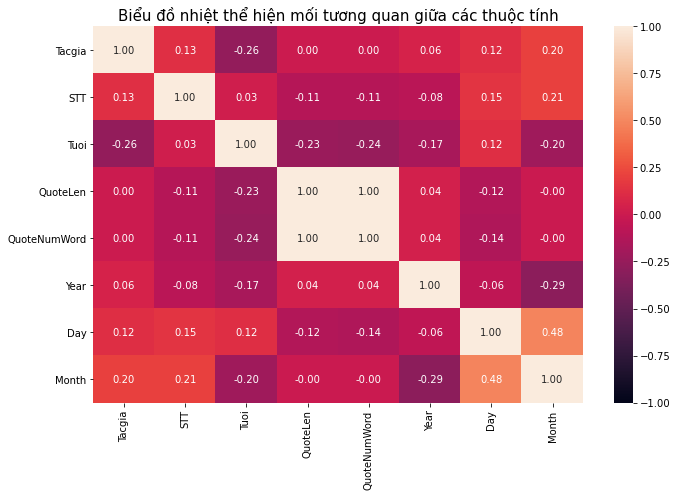

In [380]:
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1)
ax.set_title('Biểu đồ nhiệt thể hiện mối tương quan giữa các thuộc tính', fontsize=15)
f.tight_layout()
plt.show()

- QuoteNumWord và QuoteLen có độ tương quan tuyệt đối là 1.0

Chọn các attributes phù hợp để làm feature cho model

In [384]:
features = ['Tuoi', 'QuoteLen', 'QuoteNumWord', 'Year', 'Month', 'Day']
target = 'Tacgia'

## 2.4 Suy luận

### Dự đoán câu nói theo tên người nổi tiếng

In [385]:
X = df[features].values
y = df[target].values

In [389]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [390]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((80, 6), (20, 6), (80,), (20,))

In [391]:
from sklearn.metrics import accuracy_score

In [392]:
class Model:
    def __init__(self, model, name):
        self.model = model
        self.name = name
        self.is_trained = False
    
    def fit(self, Xtrain, Xtest, ytrain, ytest):
        self.model.fit(Xtrain, ytrain)
        ypredict = self.model.predict(Xtest)
        self.acc = accuracy_score(ytest, ypredict)
        self.is_trained = True
    
    def __repr__(self):
        if self.is_trained:
            return f'<{self.name} has Accuracy Score: {self.acc:3f}]>'
        return f'<{self.name} is not trained yet>'

In [405]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [406]:
models = [
    Model(GaussianNB(), 'Gaussian Naive Bayes'),
    Model(LinearSVC(), 'Linear Support Vector Machine'),
    Model(RandomForestClassifier(), 'Random Forest Classifier')
]
models

[<Gaussian Naive Bayes is not trained yet>,
 <Linear Support Vector Machine is not trained yet>,
 <Random Forest Classifier is not trained yet>]

In [407]:
for model in models:
    model.fit(Xtrain, Xtest, ytrain, ytest)

C:\Users\Tuan Nguyen Van Anh\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [408]:
models

[<Gaussian Naive Bayes has Accuracy Score: 0.500000]>,
 <Linear Support Vector Machine has Accuracy Score: 0.050000]>,
 <Random Forest Classifier has Accuracy Score: 0.500000]>]

**Kết quả tốt nhất là Gausian Naive Bayes và Random Forest với độ chính xác là 50%**

Chúng em đề xuất cách tính độ tương đồng của 2 tác giả tính số lượng từ trùng nhau trong 2 quote của 2 tác giả